<a href="https://colab.research.google.com/github/HimanshuRajput013/bike-sharing-demand-predication/blob/main/Copy_of_BIKE_SHARING_DEMAND_PREDICATION_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   - BIKE SHARING DEMAND PREDICATION



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Rental bikes is use in urban areas for mobility comfort, but it is necessary bike is availiable in time and acessiable for people at right time.In this dataset inculde Rented bike count, hours, dew temp. ,humidity, seasons, holidays, e.t.c.

In this project we have done the following:

*Analysing the data for Null and Duplicate values and tackling them using different techniques

*Merging dataframes

*Handling Outliers and correcting the data types

*Exploratory Data Analysis (EDA) using UBM rule

*Hypothesis Testing between Categorical and Numerical variables

*Categorical Encoding

*Feature Manipulation

*Scaling the data using Standard Transform

*Splitting the data

*Training different models

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes..**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import seaborn as sns

from datetime import datetime
import datetime as dt

#from google.colab import drive
#drive.mount('/content/drive')



### Dataset Loading

In [ ]:
# Load Dataset
url = 'https://drive.google.com/file/d/1pBk9AxGcXLAZzYVxLVbmzVPEKg1WVEdN/view?usp=share_link'

url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]


In [ ]:
df = pd.read_csv(url,encoding ='latin')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
row = df.shape[0]
coloumn = df.shape[1]
print(f"total rows = {row}")
print(f"total coloumns= {coloumn}")


total rows = 8760
total coloumns= 14


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_values = df.duplicated(["Date","Rented Bike Count","Hour"]).sum()
print(f"Duplicates Values in Dataset = {duplicate_values}")

Duplicates Values in Dataset = 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

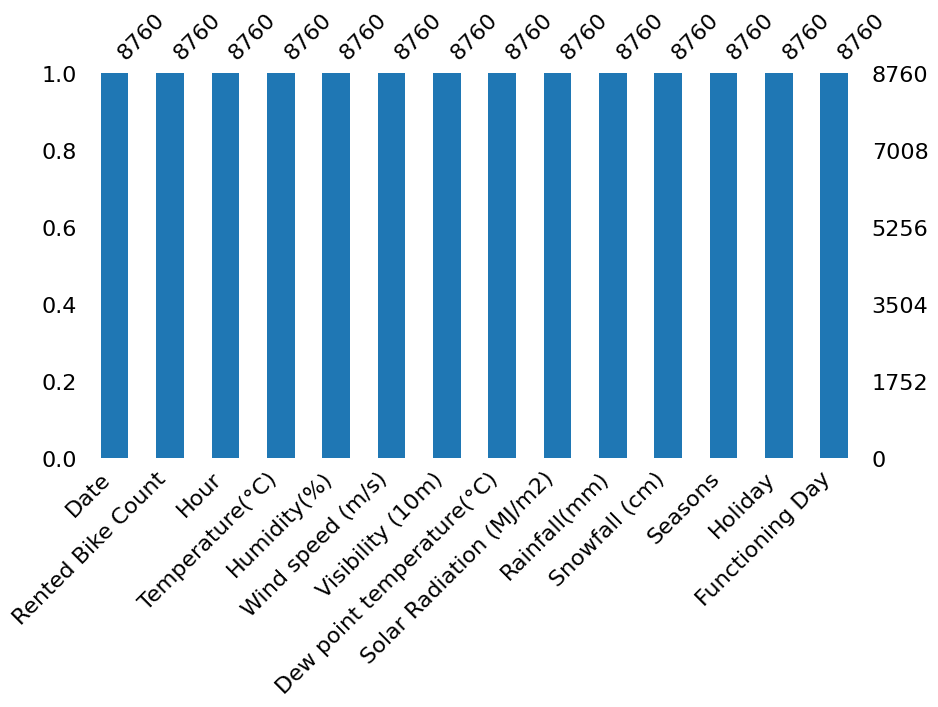

In [ ]:
# Visualizing the missing values

#import missingno library

import missingno as msno
msno.bar(df,figsize=(10,5), color="tab:blue")

### What did you know about your dataset?

1.DATASET CONTAIN TOTAL 14 COLUMNS.

2.THERE IS NO DUPLICATE VALUE, NO NULL VALUE.

3.THREE COLUMNS REQUERIES CONVERSION OF DATA FOR ANALYZE EASILY.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [ ]:
# Dataset Describe
df.describe(include="all")

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

Date : Date indiacte date for each day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, in form of  0 to 23, it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: Season of the year, type : str, there are only 4 season's in data .

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
from datetime import datetime
import datetime as dt

df['Date'] = df['Date'].apply(lambda x:
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [ ]:
df["Weekend"]=df["day"].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)

df=df.drop(columns=['Date','day','year'], axis=1)





In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [ ]:
#Month, Weekend, Hour is int64 Column, So we converted into category Column.

column = ['Hour', 'Weekend', 'month']
for col in column:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

### What all manipulations have you done and insights you found?

1.Date format change to weekend, day and month column for better evaluations.

2.Some column changes to cateogory format.

3.There is no null value,no missing data and no duplicate value present.

4.The dataset shows hourly rental data for one year(1 December 2017to 31 November 2018) i.e. 365 days, so we consider as one single year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

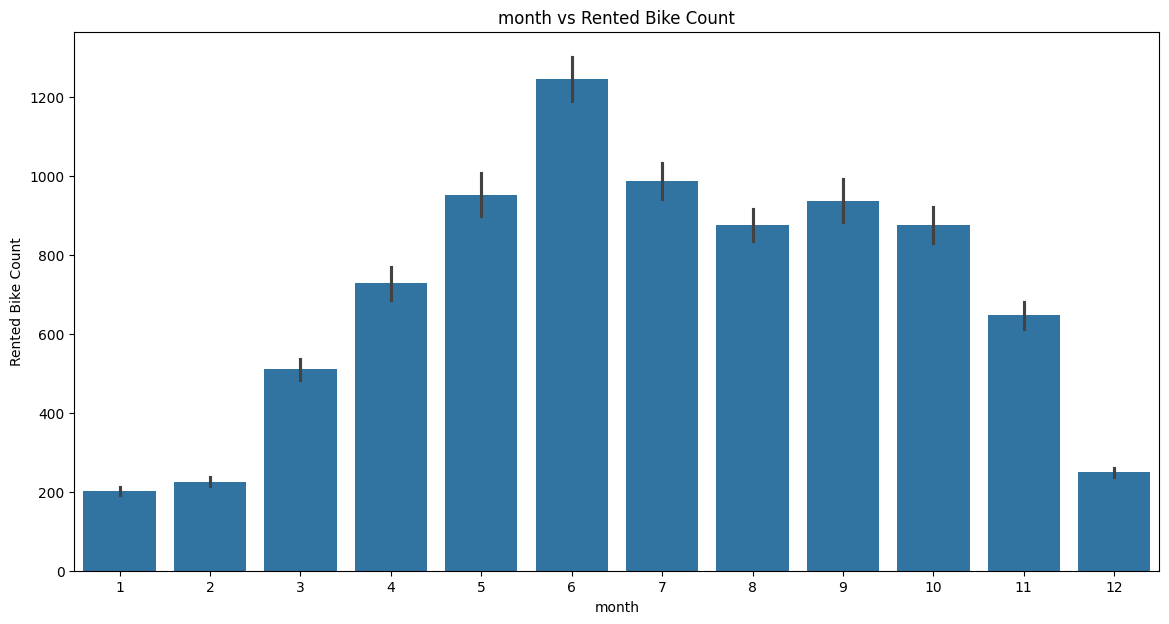

In [ ]:
# Chart - 1 visualization code

plt.figure(figsize=(14,7))

ax= sns.barplot(x=df["month"], y=df["Rented Bike Count"])
ax.set_title("month vs Rented Bike Count")
plt.show()





##### 1. Why did you pick the specific chart?

This chart shows a realation between category data of months and continous data Rented Bike Count.

##### 2. What is/are the insight(s) found from the chart?

6 months have highest rented bike beacause of summer season, and months 5 to 10 have recorded highest rented bike count because of season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can more focus on months 5 to 10 beacuse of more requirement, so we can easily fullfil demands of bikes.

## Chart-2

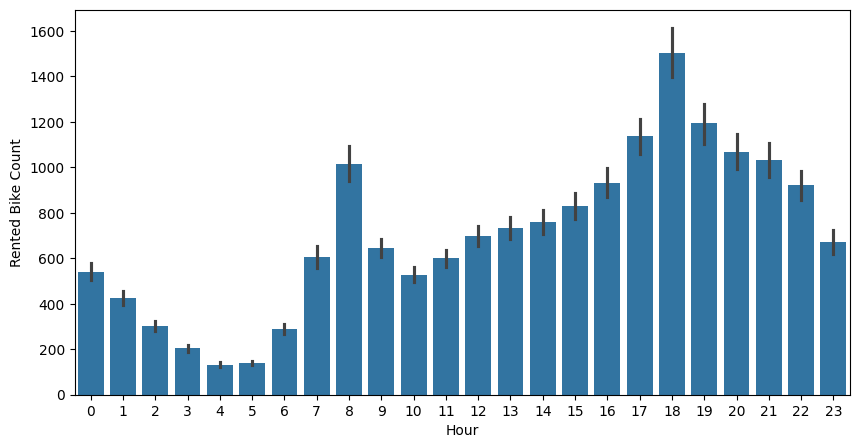

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Hour'], y=df['Rented Bike Count'])

ax.set_title("hours vs Rented Bike Count")

plt.show()

##### 1. Why did you pick the specific chart?

This is a plot between Hours VS Rented Bike Count, easily find out with specific hours have more Demand.

##### 2. What is/are the insight(s) found from the chart?

People more like to rent a bike in 7am to 9am and 5pm to 7pm may be because of working hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In **Office time** demand is high for bikes, we can increase bike count for fullfill requirment. also in **Night** is low we can reduce bike count and fullfill requirement.

#### Chart - 3

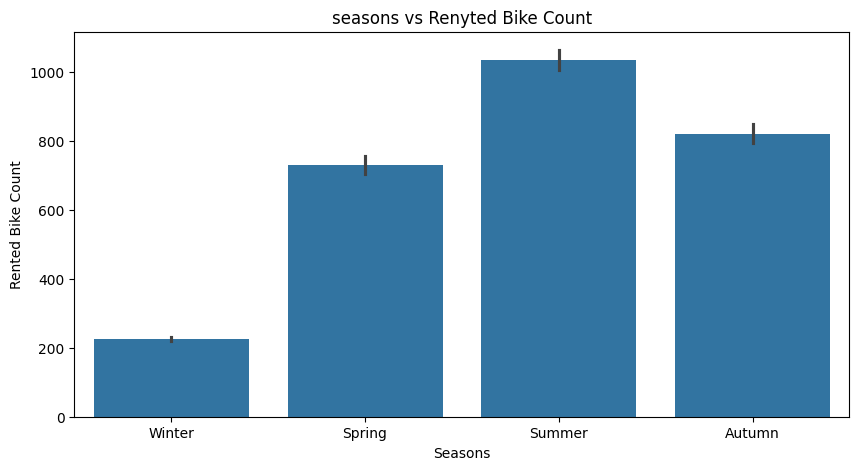

In [ ]:


plt.figure(figsize=(10,5))

ax=sns.barplot(x=df["Seasons"], y=df["Rented Bike Count"])

ax.set_title('seasons vs Renyted Bike Count');

##### 1. Why did you pick the specific chart?

This is a plot between Seasons VS Rented Bike Count, easily find out with specific season have more sales.

##### 2. What is/are the insight(s) found from the chart?

People more like to rent a bike in summer seasons not prefered in winter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

in summer demand is high for bikes, we can increase bike count for fullfill requirment.also in winter demand is low we can reduce bike count and fullfill requirement.

#### Chart - 4

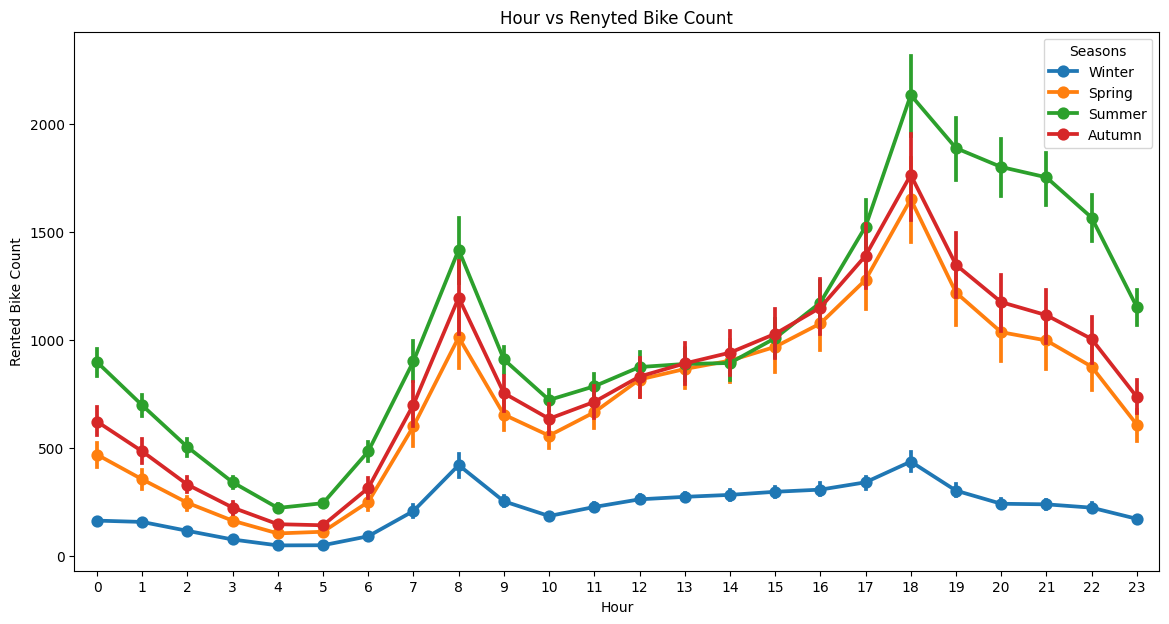

In [ ]:

plt.figure(figsize=(14,7))

ax=sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')

ax.set_title('Hour vs Renyted Bike Count');

##### 1. Why did you pick the specific chart?

This chart explain hour vs rented bike count in different seasons.


##### 2. What is/are the insight(s) found from the chart?

Rented Bike Count is maximum in Summer Seasons,Also people take more vehicle between 7am to 9 am and 5pm to 7 pm beacuse of office hours.

In winter Rented Bike Count is low because of snowfall.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In peak hours we can increase bikes count so all of people get rented bikes.

Also in winter we can reduce bike count.


#### Chart - 5

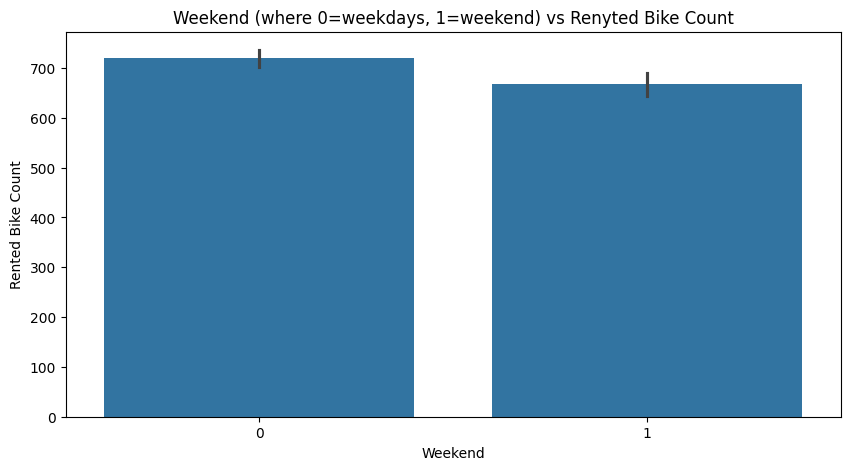

In [ ]:

plt.figure(figsize=(10,5))

ax=sns.barplot(x=df["Weekend"], y=df["Rented Bike Count"])

ax.set_title('Weekend (where 0=weekdays, 1=weekend) vs Renyted Bike Count');



##### 1. Why did you pick the specific chart?

This Graph shows weekdays and weekend with Rented Bike Count.

##### 2. What is/are the insight(s) found from the chart?

Not much different between Weekdays vs Weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

weekend and weekdays have almost same no. of Rented Bike Count.

#### Chart - 6

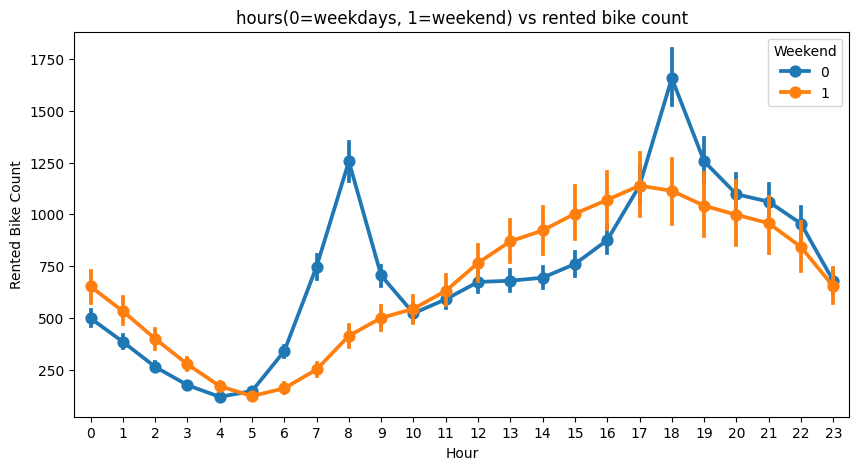

In [ ]:

plt.figure(figsize=(10,5))

ax=sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Weekend')

ax.set_title('hours(0=weekdays, 1=weekend) vs rented bike count');

##### 1. Why did you pick the specific chart?

This point chart explain Rented Bike Count in every hour in weeksdays and weekend.

##### 2. What is/are the insight(s) found from the chart?

In weeks days 7am tom 9am and 5pm to 7 pm have higher demands,may be because of office working times.

But in Weekend Demand gradually incraese 4pm to 8 pm may be when people go for outing.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In weeks days people use bikes for office work 7 am to 9 am and 5pm to 7pm, increase bikes in these hours so all people get rented bike.

#### Chart - 7

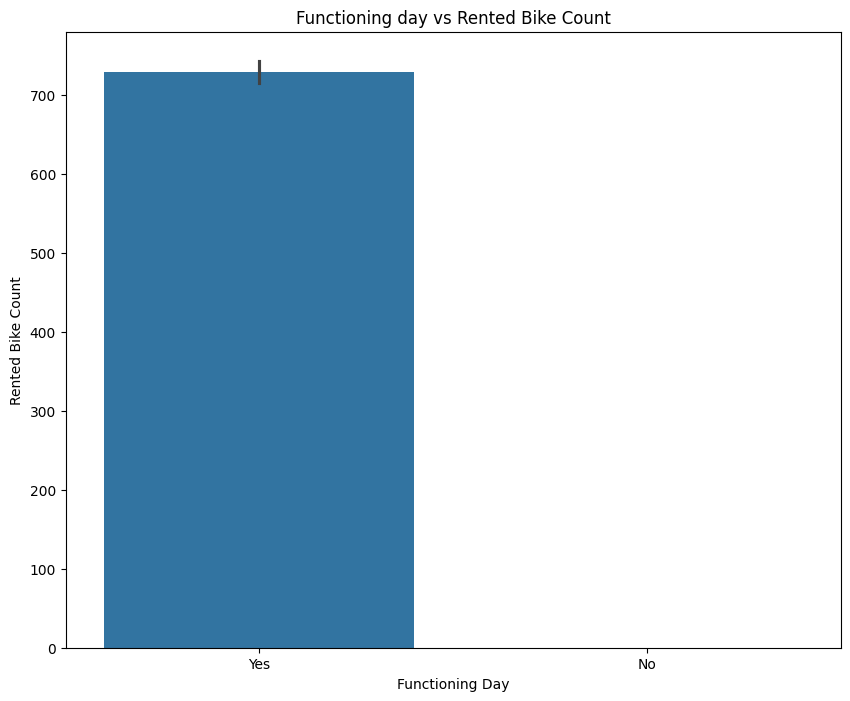

In [ ]:
plt.figure(figsize=(10,8))

ax=sns.barplot(data=df, x='Functioning Day', y='Rented Bike Count')

ax.set_title('Functioning day vs Rented Bike Count');


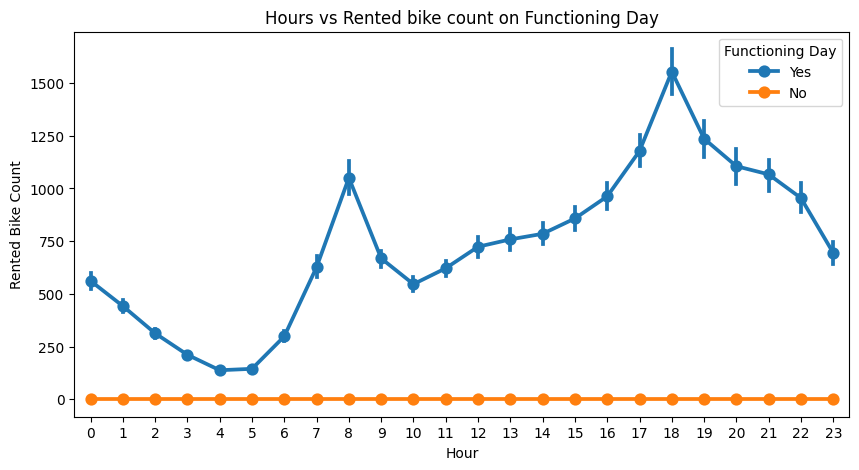

In [ ]:
plt.figure(figsize=(10,5))

ax=sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Functioning Day')

ax.set_title('Hours vs Rented bike count on Functioning Day');

##### 1. Why did you pick the specific chart?

This Graph shows funtioning day and non funtioning day Rented Bike Count.

##### 2. What is/are the insight(s) found from the chart?

Non-funtioing day have no rented bike count.People not rebted bike on Non Functioning Day

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Because People not Rented Bike on Non Functioning Days So we can close shop of Rented bike on these Days.

CHART- 8

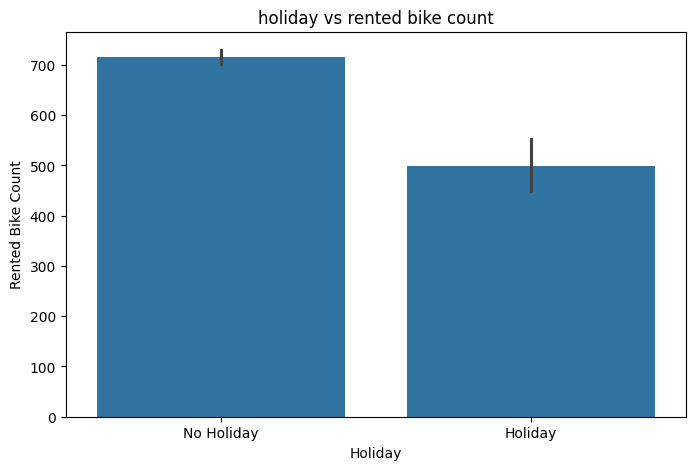

In [ ]:
plt.figure(figsize=(8,5))

ax=sns.barplot(x=df['Holiday'], y=df['Rented Bike Count'])

ax.set_title('holiday vs rented bike count');



Text(0.5, 1.0, 'holiday vs rented bike count')

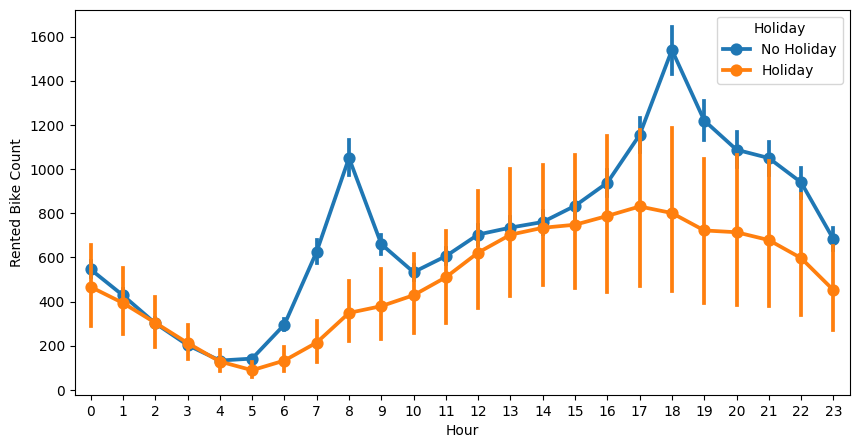

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Holiday')
ax.set_title('holiday vs rented bike count')

##### 1. Why did you pick the specific chart?

This point chart explain Rented Bike Count in every hour in Holidays and Non-Holidays.

##### 2. What is/are the insight(s) found from the chart?

In Non-hoildays days 7am tom 9am and 5pm to 7 pm have higher demands,may be because of office working times.

But in Holidays Demand gradually incraese 4pm to 8 pm may be when people go for outing.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In Holidays days people use bikes for office work 7 am to 9 am and 5pm to 7pm, increase bikes in these hours so all people get rented bike.

#### Chart - 9

In [ ]:

numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features


Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

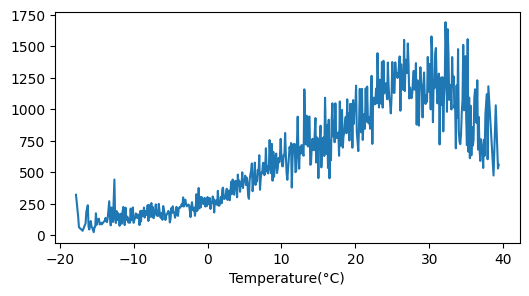

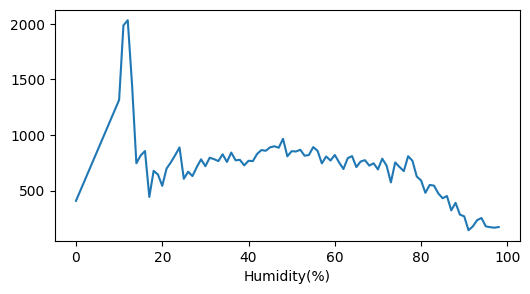

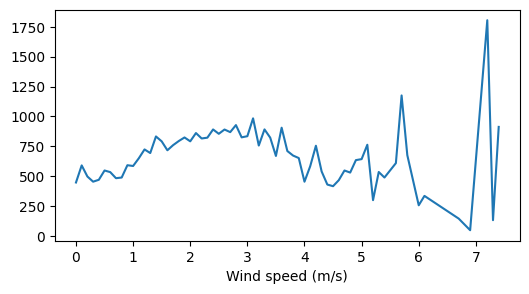

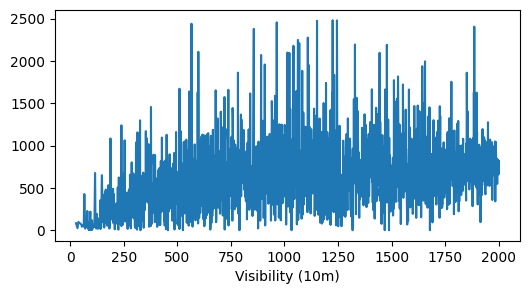

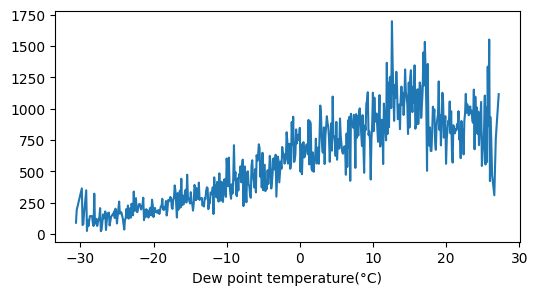

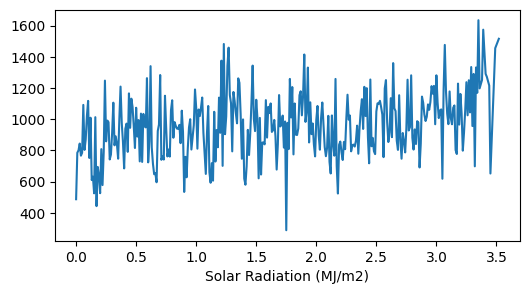

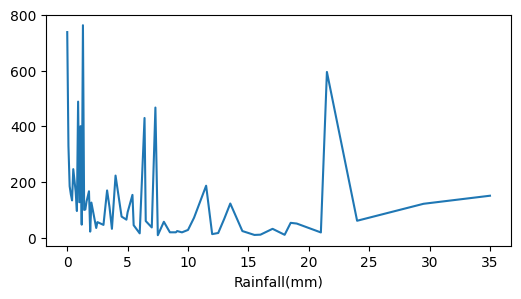

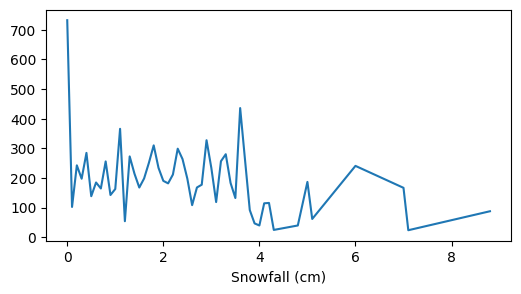

In [ ]:
for col in numerical_features[1:]:
  plt.figure(figsize=(6,3))
  df.groupby(col)['Rented Bike Count'].mean(numeric_only=True).plot()




##### 1. Why did you pick the specific chart?

all numeric feature in dataset effects the Rented Bike Count.

##### 2. What is/are the insight(s) found from the chart?

1.People more prefred bike riding when Temp is Above 25 Deg.So people love to ride in Summer

2.Rented Bike Count increase gradually when wind speed increase but when wind speed  7 m/s Rented Bike Count incraese Sharply.People love to ride bike in wind.

3.the snowfall incraese more than 4 cm Rented Bike Count Decrease, people not like to ride bike in heavy snow.

4.When the rainfall increase Bike Ride Count decrease but when it is continous Raining Bike count not decrease.This thing happen in summer when rainfall increase but temp is good,so rented bike count not decrease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes it will give positive impact to know when demand is going to high.

In [ ]:
df.loc[(df['Rainfall(mm)']>20)&(df['Rainfall(mm)']<25)]

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
5034                596   18             20.6           97               0.7   
5132                 61   20             23.5           97               0.1   
6524                 19   20             23.4           98               0.6   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
5034               222                       20.1                     0.14   
5132              1814                       22.9                     0.04   
6524                70                       23.0                     0.00   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day month  \
5034          21.5            0.0  Summer  No Holiday             Yes     6   
5132          24.0            0.0  Summer  No Holiday             Yes     7   
6524          21.0            0.0  Summer  No Holiday             Yes     8   

     Weekend  
5034       0  
5132       0  
6524       0

Now it is clear when rainfall increase 20 to 25 mm people going for working because it was weekdays and also temprature is good due to summer saesons.

#### Chart - 10
Regression Plot

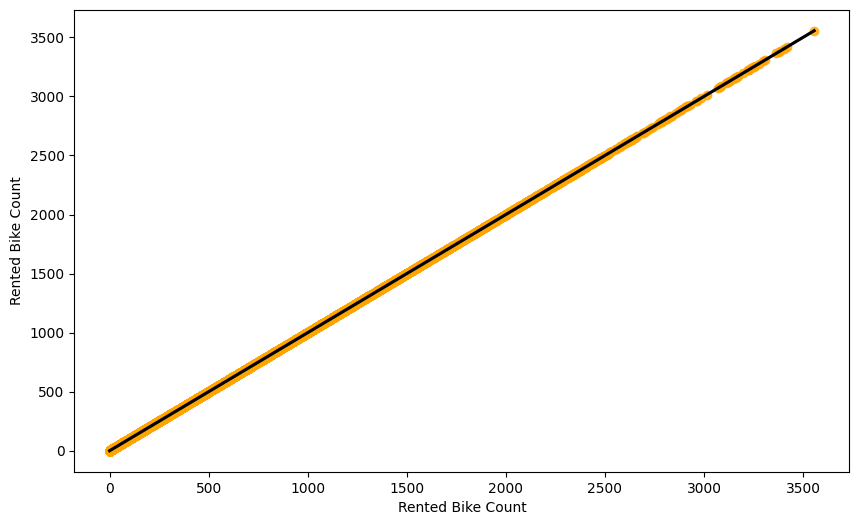

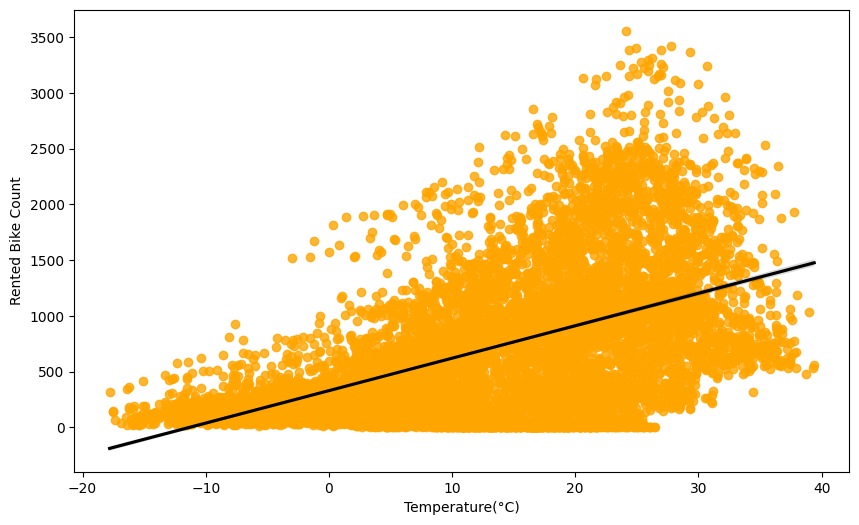

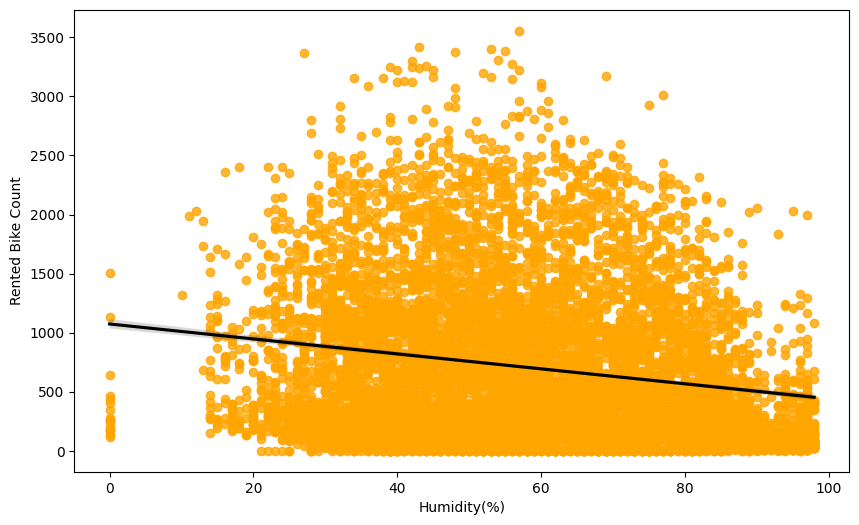

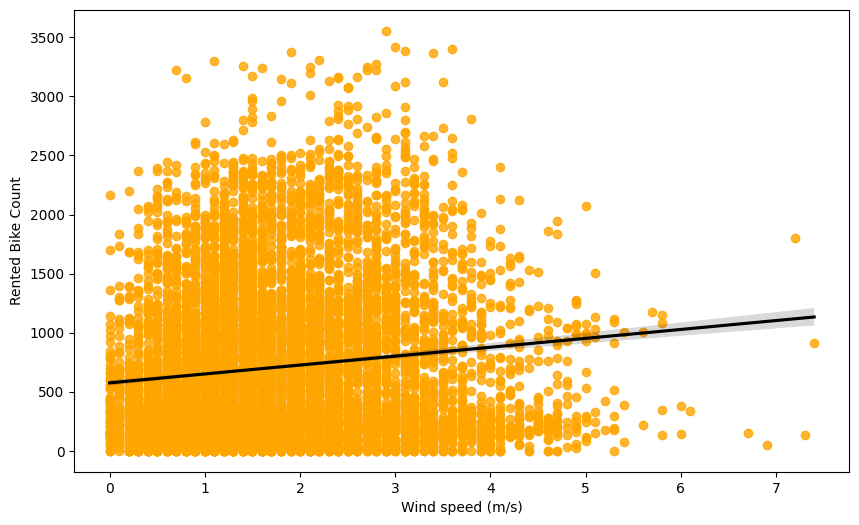

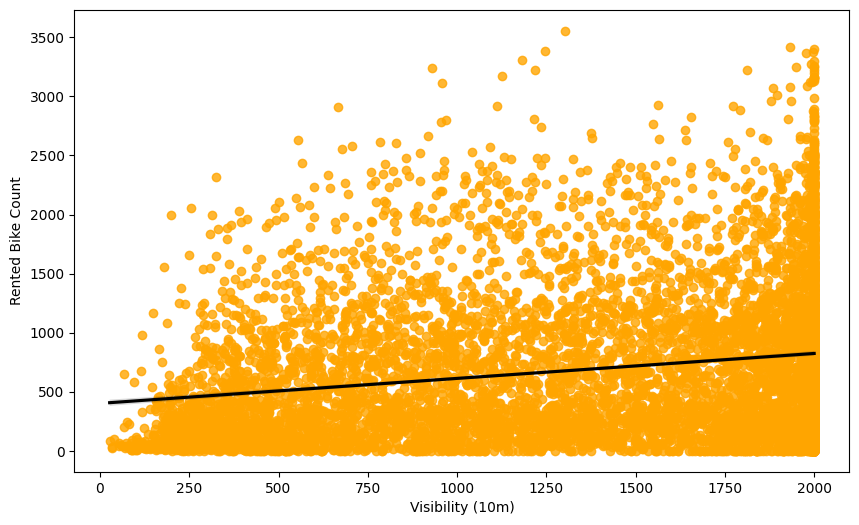

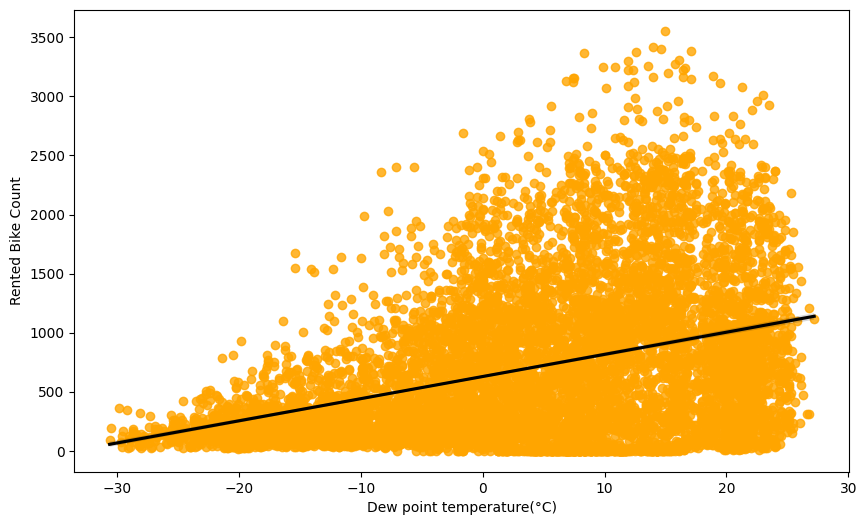

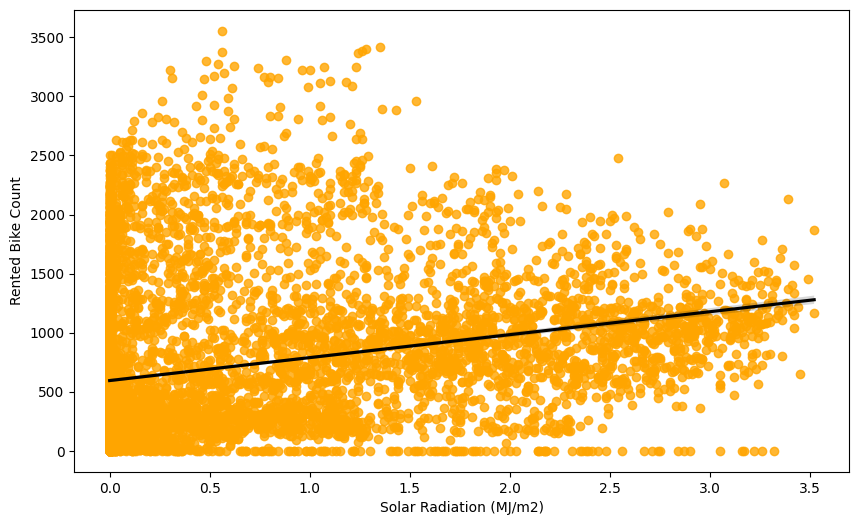

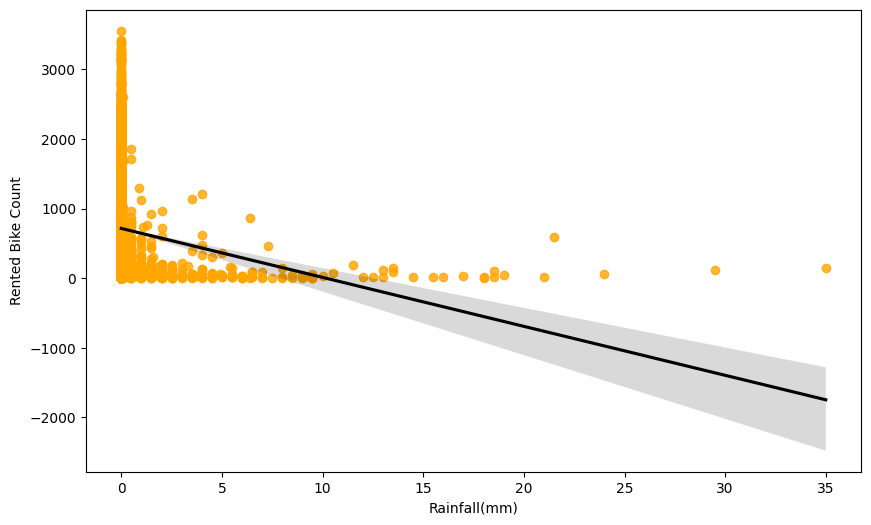

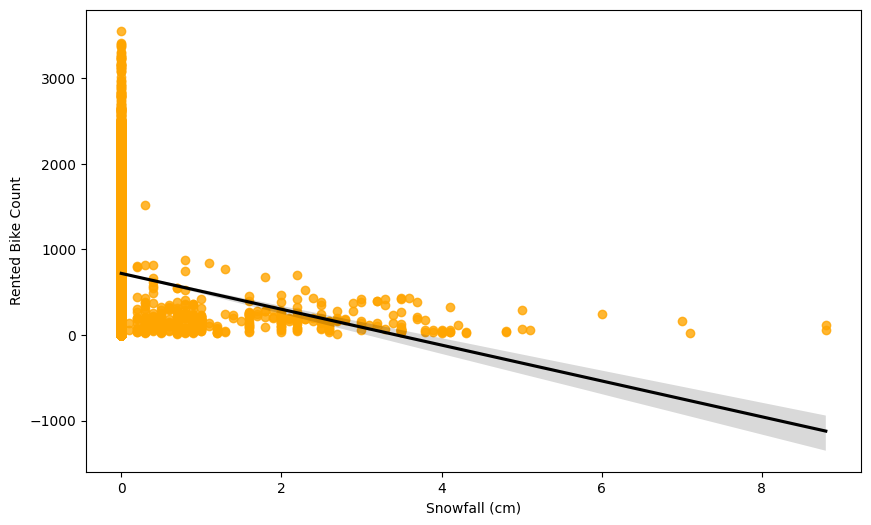

In [ ]:

for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

This Regression graph shows different numerical feautre transformation with Rented Bike count.

##### 2. What is/are the insight(s) found from the chart?

Numeric Feature like 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature' and 'Solar_Radiation' have positive effect on Rented Bike Count.Rented Bike Count increase with incraese these feature.

Numeric feature like 'Rainfall','Snowfall' and 'Humidity'have negative effect on Rented Bike Count.Rented Bike decrease with decraese these feature.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes sonme feature have positive effect, So when tenprature is high,visibility is good,wind speed is good can increase number of rented bike for all people.

#### Chart - 14 - Correlation Heatmap

<ipython-input-34-e6a58abacf89>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


<Axes: >

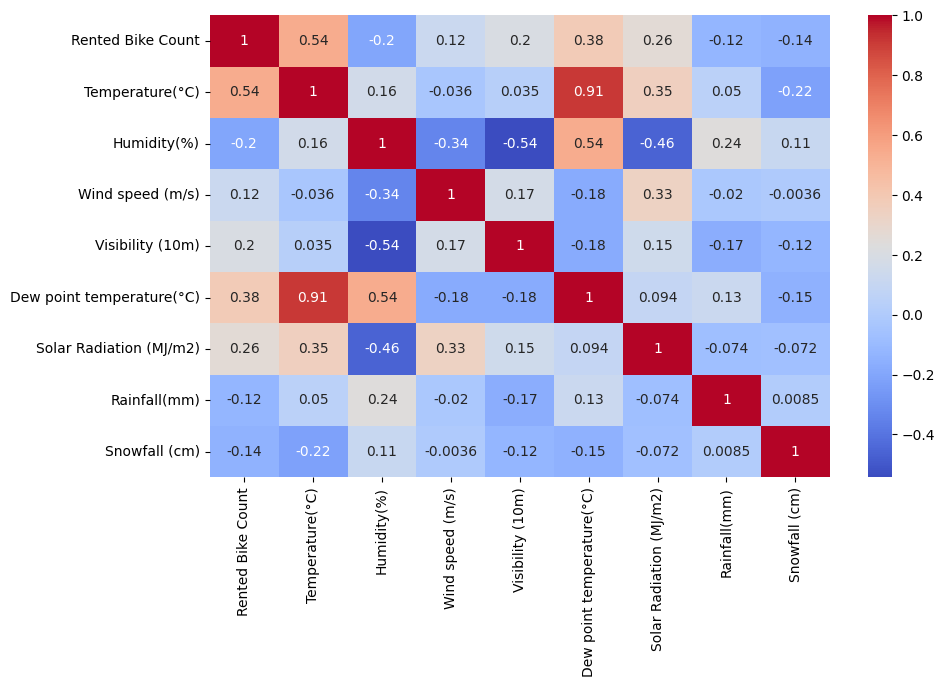

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

##### 1. Why did you pick the specific chart?

To check multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

Temprature and Dew point tempeature have high corelation about 0.91, So we can drop Dew Point Temprature feature and not effect the output.

In [ ]:
df.drop(columns=['Dew point temperature(°C)'], inplace=True)


#### Chart - 15 - Pair Plot

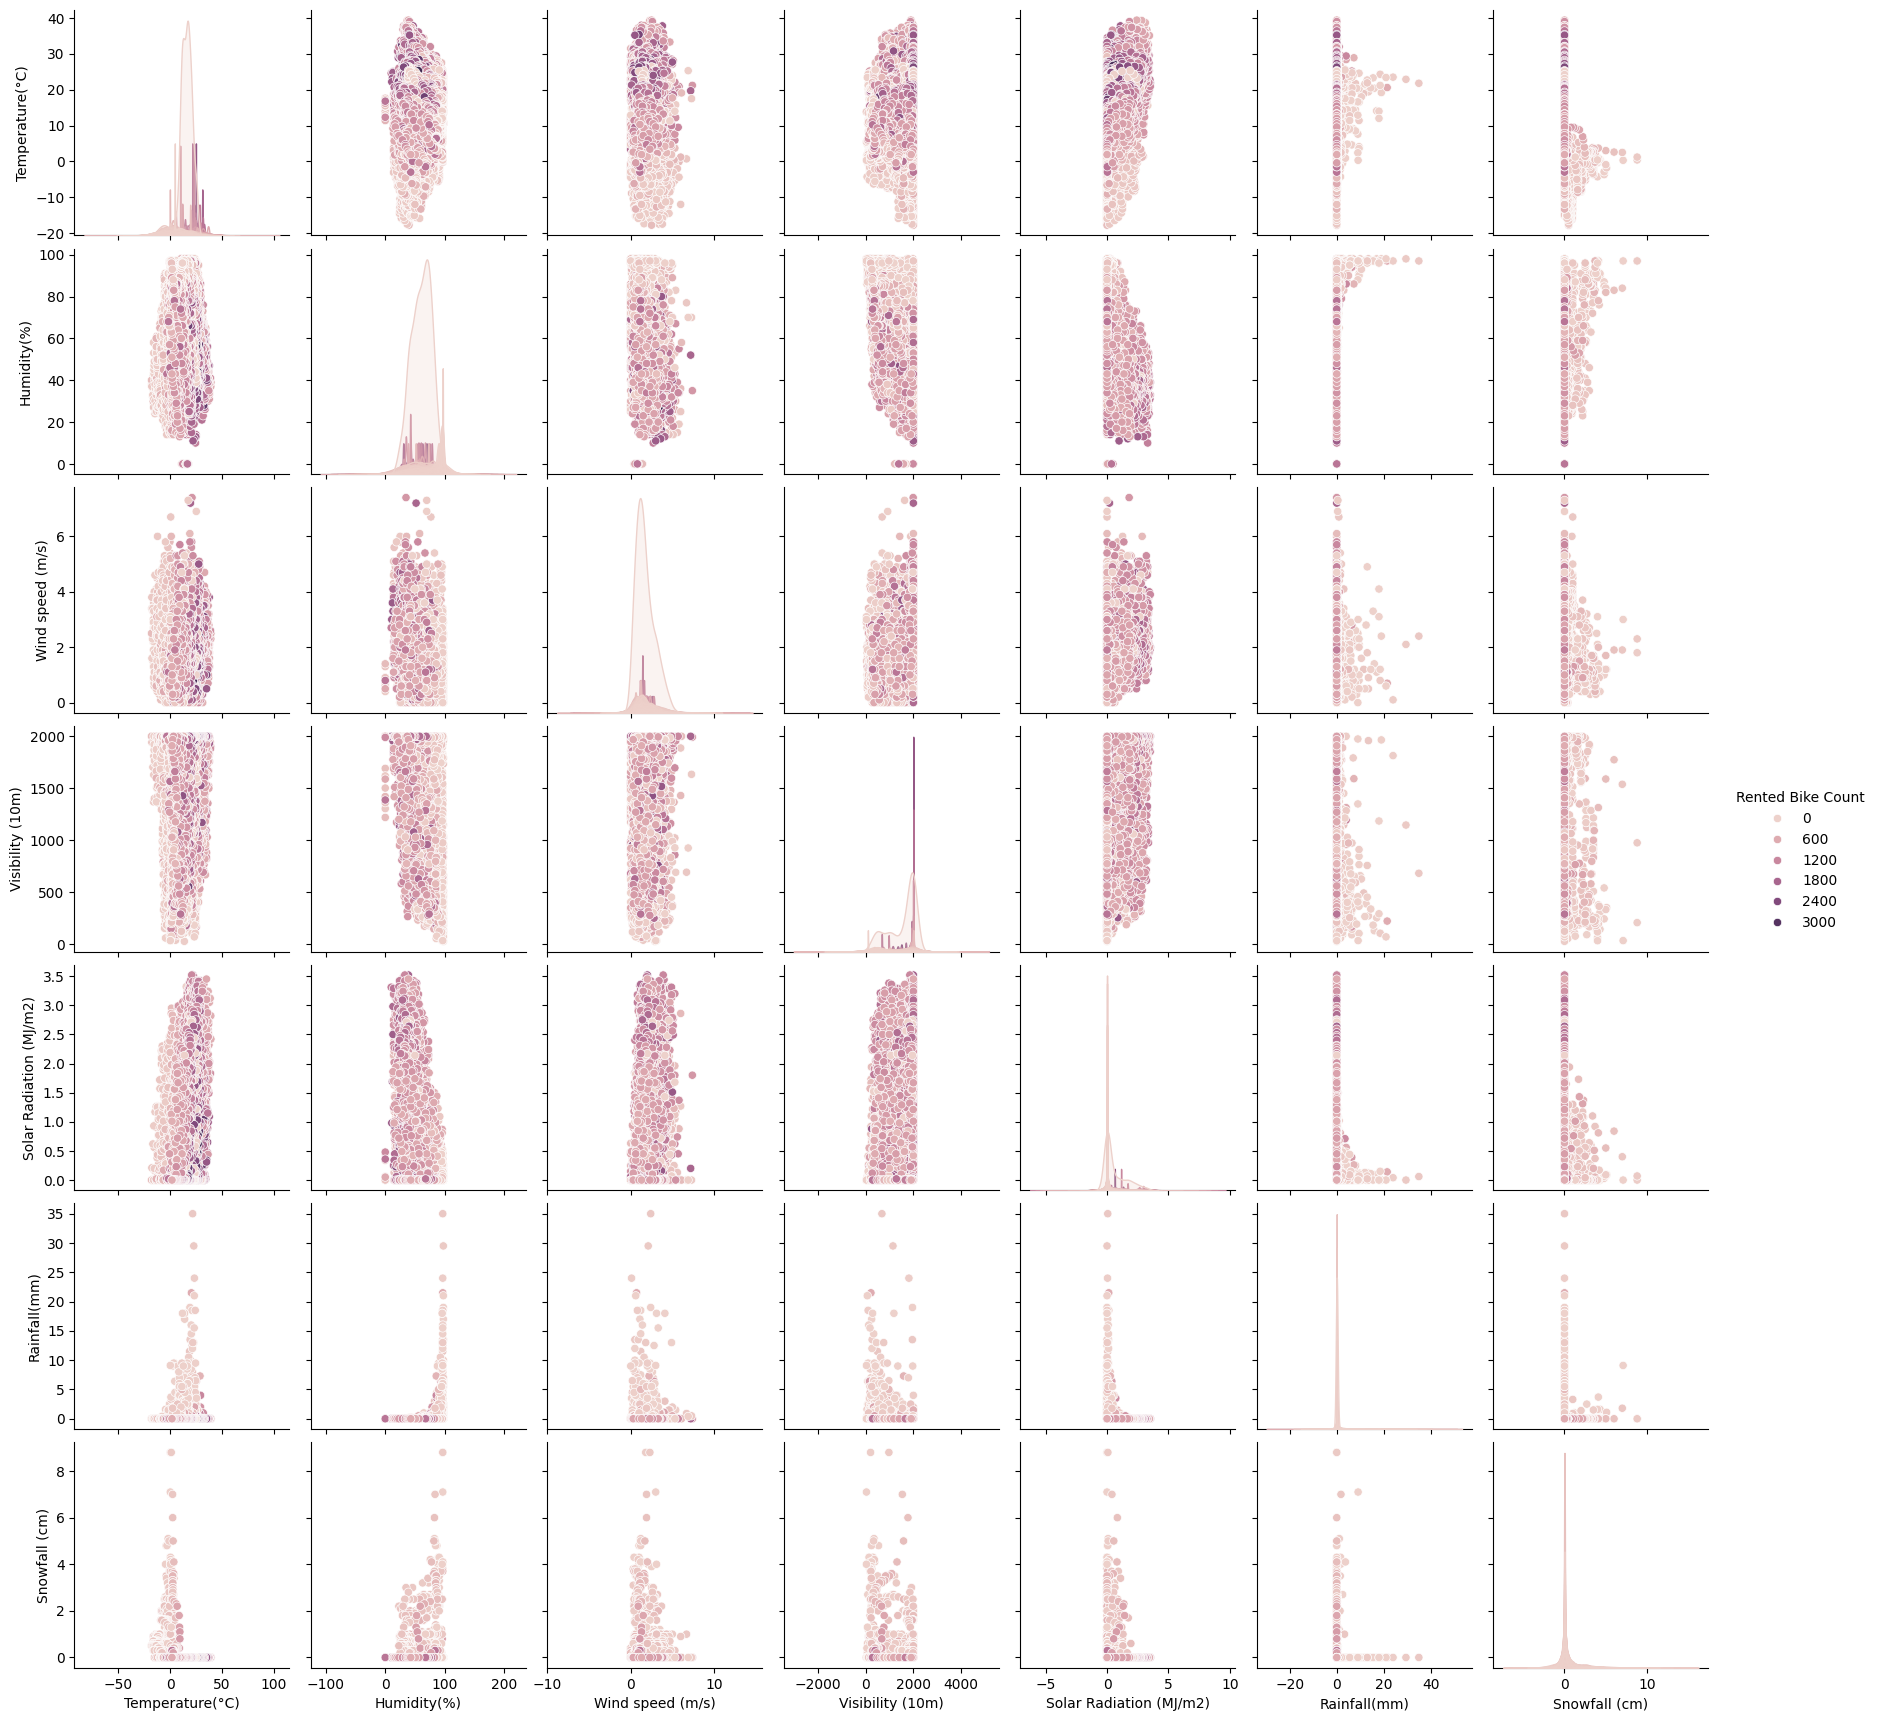

In [ ]:
sns.pairplot(df, hue="Rented Bike Count", diag_kind="kde")

##### 1. Why did you pick the specific chart?

Correlation chart help realtion between different colomn but with pairplot we can visulize the realtion between diffrent features.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.




 Null Hypothesis- Rented Bike Count and Temperature(°C) are independent to each other.

Alternate Hypothesis-Rented Bike Count and Temperature(°C) are  dependent to each other.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# importing library to conduct a pearson correlation test
from scipy.stats import pearsonr
first_s=df['Rented Bike Count']
second_s=df['Temperature(°C)']

stat, p = pearsonr(first_s,second_s)
print('stat=%.3f, p=%.2f'%(stat,p))
if p>0.05:
  print("Accept Null Hypothesis")
else:
   print("Reject Null Hypothesis")



stat=0.539, p=0.00
Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

Pearson R-test

##### Why did you choose the specific statistical test?

Two check relationship between numeric columns, correaltion is a good measure.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypthesis : Weekend and Holiday is independent to each other.
Alternate Hypothesis : Weekend and Holiday is independent to each other.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
df.info()
from scipy.stats import chi2_contingency
#Preparing contingency table
contingency_table = pd.crosstab(df['Weekend'], df['Holiday'])

observed_value=contingency_table.values
contingency_table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  Weekend                  8760 non-null   category
dtypes: categ

Holiday  Holiday  No Holiday
Weekend                     
0            336        5928
1             96        2400

In [ ]:
chi2_stat, p_val, dof, expected = chi2_contingency(observed_value)
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)
print("Expected frequencies:", expected)

if p_val < chi2_stat:
 print("Null hypothesis rejected , Alternative hypothesis accepted")
else:
 print('Null Hypothesis accepeted')

Chi-square statistic: 8.449706500943881
Degrees of freedom: 1
p-value: 0.003651023559854802
Expected frequencies: [[ 308.90958904 5955.09041096]
 [ 123.09041096 2372.90958904]]
Null hypothesis rejected , Alternative hypothesis accepted


##### Which statistical test have you done to obtain P-Value?

chi-square test

##### Why did you choose the specific statistical test?

chi square test used for compare two categorical features.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 Null Hypothesis- Rented Bike Count and Temperature(°C) are independent to each other.

Alternate Hypothesis-Rented Bike Count and Temperature(°C) are  dependent to each other.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
bike_counts = df['Rented Bike Count']
wind_speeds = df['Wind speed (m/s)']

bike_mean = bike_counts.mean()
bike_std = bike_counts.std()
wind_mean = wind_speeds.mean()
wind_std = wind_speeds.std()

t_stat, p_val = stats.ttest_ind(bike_counts, wind_speeds)
print('Bike mean:', bike_mean)

print('Wind mean:', wind_mean)
print('Bike standard deviation:', bike_std)
print('Wind standard deviation:', wind_std)
print('t-test statistic:', t_stat)
print('p-value:', p_val)



Bike mean: 704.6020547945205
Wind mean: 1.7249086757990868
Bike standard deviation: 644.9974677392156
Wind standard deviation: 1.0362999934025559
t-test statistic: 101.99359634851933
p-value: 0.0


In [ ]:
# Calculate the test statistic and p-value by Wilcoxon rank-sum test.(because standard deviation for Rented Bike Count and Wind speed have too much different)
test_stat, p_val = stats.ranksums(bike_counts, wind_speeds)

# Print the results
print('Test statistic:', test_stat)
print('p-value:', p_val)

if p_val < test_stat:
  print("Null hypothesis is rejected")
else:
  print("Null Hypothesis is accepted")

Test statistic: 106.90093913323898
p-value: 0.0
Null hypothesis is rejected


##### Which statistical test have you done to obtain P-Value?

T-test and Wilcoxon rank-sum test

##### Why did you choose the specific statistical test?

t-test for check varriable is dependent to each other and after that Wilcoxon rank-sum test for conformation because standard devation have too much different.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
month                      0
Weekend                    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values.

### 2. Handling Outliers

<ipython-input-43-0520209edd0e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")


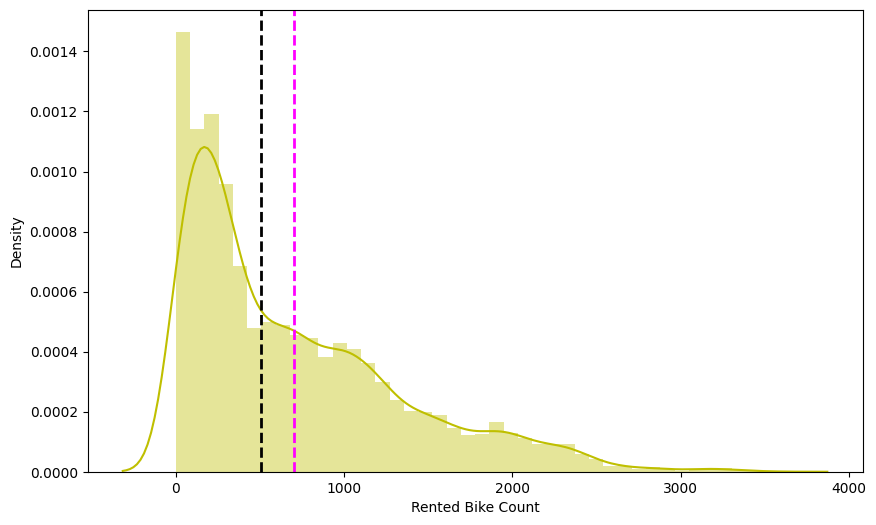

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()


Graph shows right skewness for Rented Bike Count.For Linear Regression dependent varriable should be Normal Distrubuted.

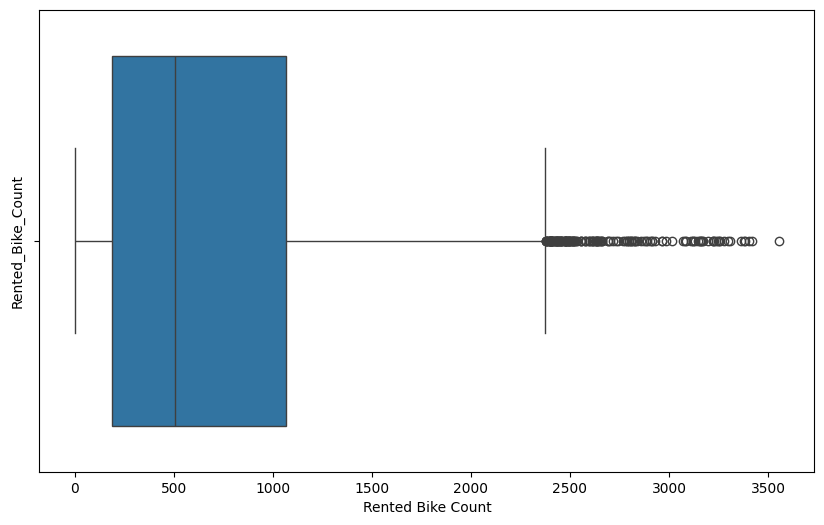

In [ ]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

We found some outlier in box-plot graph.

<ipython-input-45-02d689a7262f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")


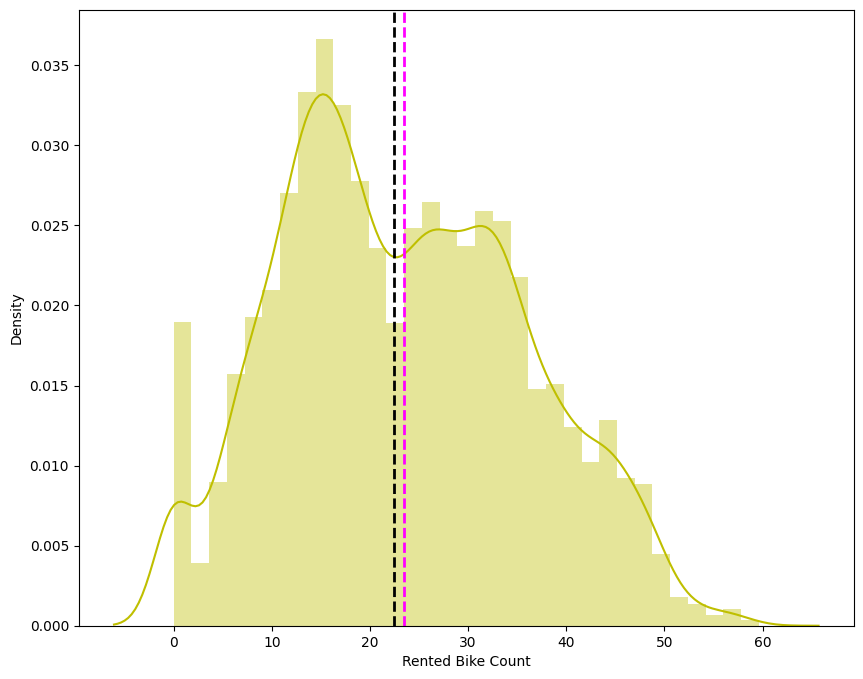

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()


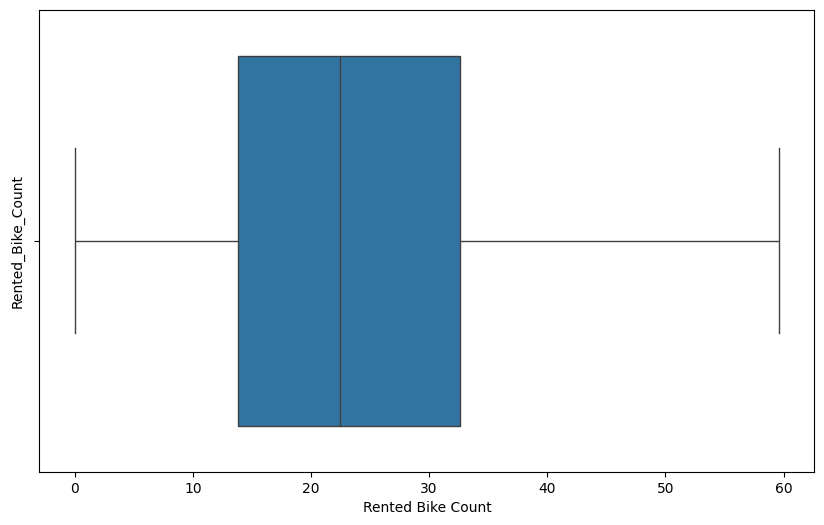

In [ ]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We use square root in Rented Bike Count, and there is no outlier.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
category_features = list(df.select_dtypes(['object','category']).columns)
category_features = pd.Index(category_features)
category_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'Weekend'], dtype='object')

In [ ]:
#create copy and one hot encoding
from sklearn.preprocessing import OneHotEncoder

df_copy=df

def one_hot_encoding(data,column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
  data = data.drop([column], axis=1)
  return data

for col in category_features:
   df_copy = one_hot_encoding(df_copy, col)

df_copy.head()



Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Hour_1  Hour_2  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       0       0  ...        0        0        0        0        0        0   
1       1       0  ...        0        0        0        0        0        0   
2       0       1  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   month_10  month_11  month_12  Weekend_1  
0         0         0         1          0  
1         0         0         1          0  
2         0         0         1          0  
3         0         0         1          0  
4         0         0         1          0  

[5 rows x 48 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

NOT REQUIRED.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
all_col = list(set(df_copy.columns)-{"Rented Bike Count"})
X= df_copy[all_col]
y = df_copy['Rented Bike Count']




##### What all feature selection methods have you used  and why?

We use all coloumn as a fetaures.

##### Which all features you found important and why?

All Features are important and we take all features.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, there is some outliers in Rented Bike Count.

In [ ]:
# Transform Your data
Y_sqrt = np.sqrt(df_copy['Rented Bike Count'])

### 6. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X , Y_sqrt , test_size=0.2 , random_state= 42 )
print(X_train.shape)
print(X_test.shape)

(7008, 47)
(1752, 47)


In [ ]:
 list(X_train.columns)

['Seasons_Winter',
 'Hour_8',
 'Seasons_Summer',
 'month_12',
 'Hour_9',
 'Hour_23',
 'Hour_4',
 'month_7',
 'Solar Radiation (MJ/m2)',
 'Holiday_No Holiday',
 'Hour_14',
 'Functioning Day_Yes',
 'month_9',
 'Hour_5',
 'month_8',
 'Rainfall(mm)',
 'Hour_13',
 'Hour_1',
 'Weekend_1',
 'month_6',
 'Hour_18',
 'Hour_3',
 'Hour_21',
 'Seasons_Spring',
 'Hour_15',
 'Hour_6',
 'month_5',
 'Hour_22',
 'Hour_16',
 'month_4',
 'Humidity(%)',
 'Hour_20',
 'Hour_19',
 'Hour_12',
 'Hour_17',
 'Hour_11',
 'Visibility (10m)',
 'Wind speed (m/s)',
 'month_2',
 'month_10',
 'Hour_7',
 'Snowfall (cm)',
 'month_3',
 'Temperature(°C)',
 'Hour_2',
 'month_11',
 'Hour_10']

##### What data splitting ratio have you used and why?

In general, an 80-20 split is a common default choice for splitting a dataset into training and testing sets because it provides a large enough training set to effectively train the model, while also providing enough data in the testing set to accurately evaluate the model's performance.

If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split.

## 7.Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## ***7. ML Model Implementation***



### ML Model - 1 LINEAR REGRESSION

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

# Fit the Algorithm

lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))
# Predict on the model

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print(lr.coef_)
print(lr.intercept_)



Training R2
0.7777748568877658
Testing R2
0.7716039414192075
[ 8.57519819e+12  1.42480469e+00  7.25340385e+13  5.77383419e-01
  2.69209548e-01  3.05207461e-01 -1.89593257e+00 -4.09838625e+13
  6.62749690e-01  7.51309670e-01 -5.74957918e-01  5.24104832e+00
  5.43466107e+12 -1.82755877e+00 -4.09523650e+13 -1.80612045e+00
 -4.75438247e-01 -3.82379119e-01 -7.04585714e-01 -4.04114759e+13
  2.04552314e+00 -1.44311804e+00  1.29544641e+00 -2.35715299e+13
 -3.55820376e-01 -8.70501671e-01  2.08485929e+13  1.06598733e+00
  9.57232703e-02  2.02313546e+13 -2.52511240e+00  1.22063161e+00
  1.41289378e+00 -4.84821320e-01  8.28666687e-01 -6.32398605e-01
  5.56078911e-01 -7.80029297e-02 -1.91894531e-01  5.66042241e+12
  3.84323120e-01 -4.24804688e-02  2.08795353e+13  5.97998047e+00
 -9.78685379e-01  5.45653681e+12 -6.44302368e-01]
23.450870773389095


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_train**2), (y_pred_train**2))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 34.507666894987
RMSE : 5.874322675422844
MAE : 4.444675719225884
R2 : 0.7549503743733328
Adjusted R2 : 0.7481913764833954


In [ ]:
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),3)
       }
training_df=pd.DataFrame(dict1,index=[1])

training_df


Model    MAE     MSE   RMSE  R2_score  Adjusted R2
1  Linear regression   4.445  34.508  5.874     0.755        0.748

In [ ]:
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score((y_test**2), (y_pred_test**2))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 35.153942642483514
RMSE : 5.929076036152979
MAE : 4.473634715712638
R2 : 0.7651095576610027
Adjusted R2 : 0.7586307719861595


In [ ]:
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

test_df


Model    MAE     MSE   RMSE  R2_score  Adjusted R2
1  Linear regression   4.474  35.154  5.929     0.765         0.76

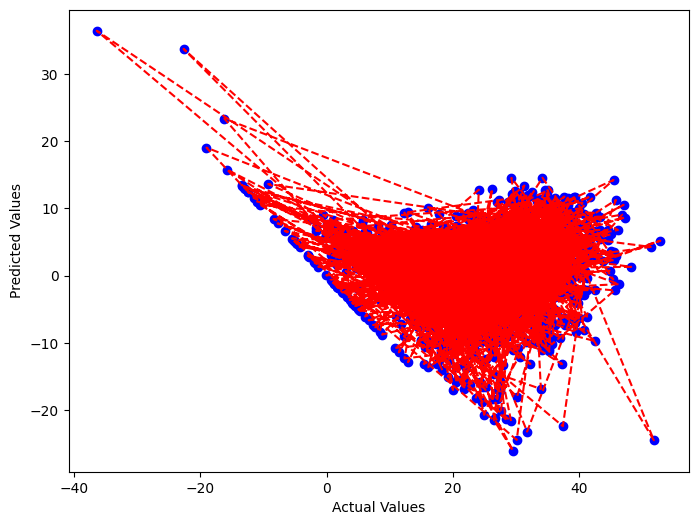

In [ ]:
### Heteroscedasticity
plt.figure(figsize=(8, 6))
plt.scatter((y_pred_test),(y_test)-(y_pred_test), color='blue')
plt.plot((y_pred_test),(y_test)-(y_pred_test), color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

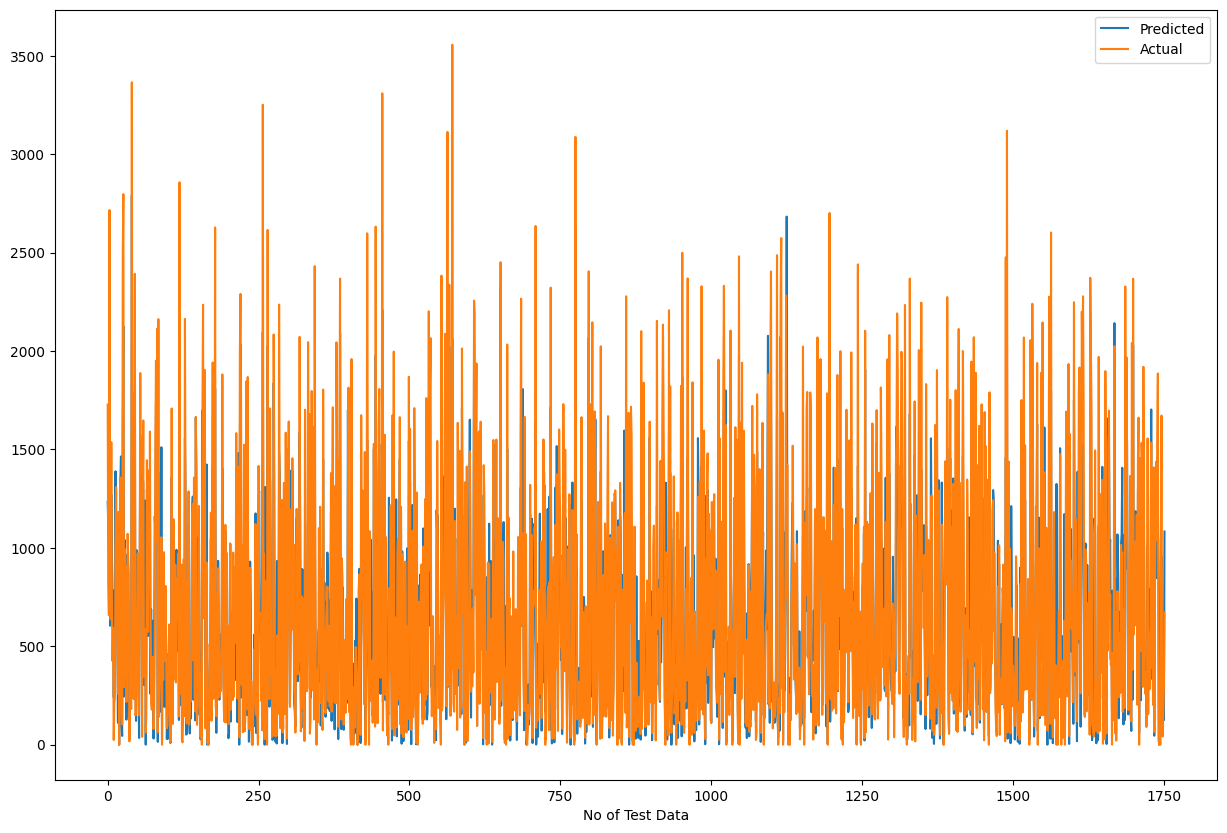

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
from sklearn.model_selection import GridSearchCV

# Predict on the model
np.random.seed(42)  # for reproducible results
Glinear_regressor= LinearRegression()
parameters = {'fit_intercept':[True,False]}
Grid_reg = GridSearchCV(Glinear_regressor,parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
Grid_reg.fit(X_train,y_train)
# Predict on the model
y_train_gridreg_pred = Grid_reg.predict(X_train)
y_test_gridreg_pred = Grid_reg.predict(X_test)

print(f"The best alpha value found out to be: {Grid_reg.best_params_}")
print(f"Negative mean square error is: {Grid_reg.best_score_}")

The best alpha value found out to be: {'fit_intercept': True}
Negative mean square error is: -35.22039017828259


In [ ]:

#coefficients after hyperparamenter and crossvalidation
Grid_reg.best_estimator_.coef_

array([ 8.57519819e+12,  1.42480469e+00,  7.25340385e+13,  5.77383419e-01,
        2.69209548e-01,  3.05207461e-01, -1.89593257e+00, -4.09838625e+13,
        6.62749690e-01,  7.51309670e-01, -5.74957918e-01,  5.24104832e+00,
        5.43466107e+12, -1.82755877e+00, -4.09523650e+13, -1.80612045e+00,
       -4.75438247e-01, -3.82379119e-01, -7.04585714e-01, -4.04114759e+13,
        2.04552314e+00, -1.44311804e+00,  1.29544641e+00, -2.35715299e+13,
       -3.55820376e-01, -8.70501671e-01,  2.08485929e+13,  1.06598733e+00,
        9.57232703e-02,  2.02313546e+13, -2.52511240e+00,  1.22063161e+00,
        1.41289378e+00, -4.84821320e-01,  8.28666687e-01, -6.32398605e-01,
        5.56078911e-01, -7.80029297e-02, -1.91894531e-01,  5.66042241e+12,
        3.84323120e-01, -4.24804688e-02,  2.08795353e+13,  5.97998047e+00,
       -9.78685379e-01,  5.45653681e+12, -6.44302368e-01])

In [ ]:


#intercept after hyperparamenter and crossvalidation
Grid_reg.best_estimator_.intercept_



23.450870773389095

In [ ]:
#calculate MSE
MSE_Grid_reg= mean_squared_error((y_train), (y_train_gridreg_pred))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_train_gridreg_pred)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_train**2), (y_train_gridreg_pred**2))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 35.153942642483514
RMSE : 5.929076036152979
MAE : 4.444675719225884
R2 : 0.7549503743733328
Adjusted R2 : 0.7481913764833954


In [ ]:
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_test_gridreg_pred)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_test_gridreg_pred)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score((y_test**2), (y_test_gridreg_pred**2))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_lr)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 35.153942642483514
RMSE : 5.929076036152979
MAE : 4.473634715712638
R2 : 0.7651095576610027
Adjusted R2 : 0.7586307719861595


##### Which hyperparameter optimization technique have you used and why?

Only hyperparameter used was fit intercept. Linear Regression presents itself with very little option for hyperparameter optimization since it is the simplest model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement in metrics after cross validation, since the data with which we trained the Linear Regression model already has a lot of information. Training with Cross Validation will not help in improving the best fit line.


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


# Creating Ridge instance
Dt_reg= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the Decision Tree model
Griddecision_tree = GridSearchCV(Dt_reg, parameters, scoring='neg_mean_squared_error', cv=5)
Griddecision_tree.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [16, 17, 18],
                         'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [1, 2, 4]},
             scoring='neg_mean_squared_error')

In [ ]:
y_train_grid_Dt_pred = Griddecision_tree.predict(X_train)
y_test_grid_Dt_pred = Griddecision_tree.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {Griddecision_tree.best_params_}")
print(f"Negative mean square error is: {Griddecision_tree.best_score_}")

#y_test_grid_Dt_pred=pd.DataFrame(y_test_grid_Dt_pred).values


The best alpha value found out to be: {'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 2}
Negative mean square error is: -23.657892372627906


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",Griddecision_tree.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_train_grid_Dt_pred)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train,y_train_grid_Dt_pred)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_train_grid_Dt_pred)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train**2, y_train_grid_Dt_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d)

Model Score: -14.57429104301632
MSE : 14.57429104301632
RMSE : 3.8176289818441393
MAE : 2.507661708205252
R2 : 0.9061433529351659
Adjusted R2 : 0.876963216056698


In [ ]:
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

training_df

Model    MAE     MSE   RMSE  R2_score  Adjusted R2
0         Linear regression   4.445  34.508  5.874     0.755        0.748
1  Dicision tree regression   2.508  14.574  3.818     0.906        0.880

In [ ]:
#calculate MSE
MSE_d= mean_squared_error(y_test, y_test_grid_Dt_pred)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_test_grid_Dt_pred)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_test_grid_Dt_pred))
print("R2 :",r2_d)
Adjusted_R2_dt=(1-(1-r2_score((y_test**2), (y_test_grid_Dt_pred**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_dt )

MSE : 23.40311774270156
RMSE : 4.837676895236138
MAE : 3.193795509663671
R2 : 0.8479493493718225
Adjusted R2 : 0.7958710374581056


In [ ]:
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

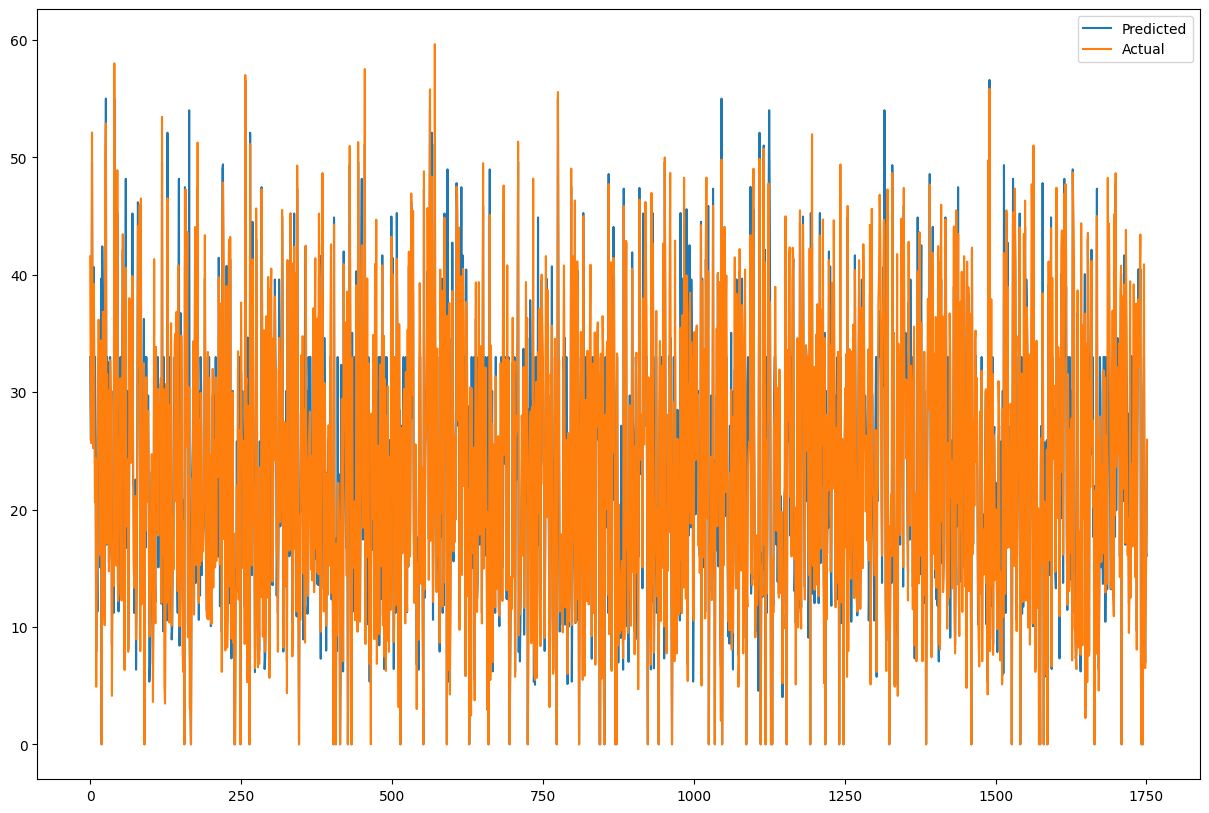

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_test_grid_Dt_pred)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

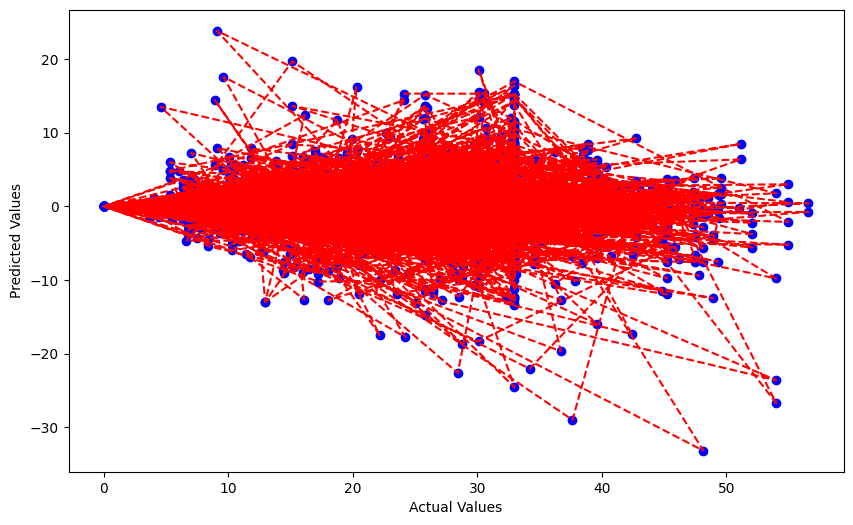

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter((y_test_grid_Dt_pred),(y_test)-(y_test_grid_Dt_pred), color='blue')
plt.plot((y_test_grid_Dt_pred),(y_test)-(y_test_grid_Dt_pred), color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

As compared to Linear regression and Elastic Net, we have observed major improvement in our performance with Decision Tree Model with best parameter for max tree length as 18 for the model.

The R2 score now is 0.84 on train data, Seeing the R2 score..